# Deep learning framework example: Movie Review Dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).  This dataset contains hand written digits and their labels.

Before you run this notebook, you must ensure the corpus is installed.  Please see this example's [online documentation](https://plandes.github.io/deepnlp/doc/movie-example.html) file for more information.  Jupyter should be started from the `example/movie` directory.

**Important**: Please see the Iris notebook example in the `zensols.deeplearn` API first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
# set up notebook environment
import sys
from pathlib import Path
app_root_dir = Path('..')
# add the example to the Python library path
sys.path.append(str(app_root_dir / 'src'))
# add the deepnlp path
sys.path.append('../../../src/python')

## Configure and create the app specific facade

Now that the interpreter environment is set up, we can import local packages.

In [2]:
from zensols.deeplearn import TorchConfig
from zensols.deeplearn.cli import JupyterManager
from zensols import deepnlp
from movie import CliFactory

# reset random state for consistency and initialize the deepnlp library
deepnlp.init()

# a utility helper for Jupyter notebooks, which creates the app, which in turn creates the facade
mng = JupyterManager(
    # an instance of zensols.cli.ApplicationFactory
    cli_class=CliFactory,
    # factory args, which for the example implemenation, sets the root directory for the config
    factory_args={'root_dir': app_root_dir},
    # set a function that is called to create the command line argumentsm; all arguments given 
    # ``create_facade`` are available in this lambda
    cli_args_fn=lambda model: ['-c', str(app_root_dir / 'models' / f'{model}.conf')])

## Print information about 

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [3]:
from io import StringIO
facade = mng.create_facade('glove50')
from zensols.config import Writable
# set indention level for human readable (pretty print like) output
Writable.WRITABLE_INDENT_SPACE = 2
facade.write()

movie.dataset: maybe creating and then loading dataset
movie.dataset: parsing train in ../corpus/dataset/train.csv
movie.dataset: parsing test in ../corpus/dataset/test.csv
movie.dataset: parsing dev in ../corpus/dataset/dev.csv


executor:
  model: Review: glove_50 
  feature splits:
    split stash splits:


zensols.multi.stash: feature_factory_stash: spawning work with chunk size 1402 across 8 workers


        dev: 1029 (9.2%)
        test: 2099 (18.7%)
        train: 8086 (72.1%)
        total: 11214


zensols.multi.stash: processed chunks in 40s
zensols.multi.stash: completed work in ReviewFeatureStash in 41s
zensols.deeplearn.batch.multi: batch_stash: spawning work with chunk size 29 across 2 workers


    total this instance: 11214
    keys consistent: True
  batch splits:
    split stash splits:
        dev: 6 (10.3%)
        test: 11 (19.0%)
        train: 41 (70.7%)
        total: 58


zensols.deeplearn.batch.multi: using torch multiproc pool: <multiprocessing.pool.Pool state=RUN pool_size=2>
zensols.deeplearn.batch.multi: processed chunks in 2 minutes, 10s
zensols.multi.stash: completed work in BatchStash in 2 minutes, 10s
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0


    total this instance: 58
    keys consistent: True
    delegate:
      name: batch_stash
      chunk_size: 0
      workers: 2
      batch_size: 200
      data_point_id_sets_path: ../data/batch/batch-point-keys.dat
      batch_limit: 9223372036854775807
      delegate_attr: True
      _has_data: True
      is_child: False
      _decoded_attributes: {'enums', 'label', 'glove_50_embedding', 'dependencies'}
      priming: False
  network settings:
    name: net_settings
    dropout: 0.2
    recurrent_settings:
      name: recurrent_settings
      dropout: 0.2
      network_type: lstm
      aggregation: max
      bidirectional: True
      hidden_size: 36
      num_layers: 1
    linear_settings:
      name: linear_settings
      dropout: 0.2
      out_features: 2
      middle_features:
        10
      proportions: True
      repeats: 1
  model settings:
    name: model_settings
    path: ../target/model/glove_50_embedding
    learning_rate: 0.001
    epochs: 90
    max_consecutive_increa

## Train and test the model

Train and test the model with the default (low) number of epochs to make sure everything is working.

In [4]:
facade.epochs = 2
mng.run(display_results=False)

zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: loaded 47 batches in 2s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 2 epochs using learning rate 0.001
tr:162.729|va min:122.398|va:119.650|lr:0.001 \/: 100%|███████████████████████████████████| 2/2 [00:01<00:00,  1.08it/s]zensols.deeplearn.model.executor.status: epoch threshold reached at 2
zensols.deeplearn.model.executor.status: final minimum validation loss: 119.65004964669545, 2 decreases
zensols.deeplearn.model.executor.statu

## Tune hyperparameters

Set model parameters to get a feel for where they need to be before changing features.

zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 75 epochs using learning rate 0.001
tr:102.810|va min:89.247|va:89.654|lr:0.001 /\: 100%|███████████████████████████████████| 75/75 [01:43<00:00,  1.09s/it]zensols.deeplearn.model.executor.status: epoch threshold reached at 75
zensols.deeplearn.model.executor.status: final minimum validation loss: 89.2467779815197, 58 decreases
zensols.deeplearn.model.executor.status: executed train in 1 minute, 44s
zensols.deeplearn.model.executor.status: deallocating 0 batches
zensols.deeplearn.model.facade: trained in 1 m

Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 05/29/2021 01:54:15:990640
    ended: 05/29/2021 01:55:59:740990
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 75/75
    ave/min loss: 102.81042/19.63741
    accuracy: 0.740 (5983/8086)
    micro: F1: 0.740, precision: 0.740, recall: 0.740
    macro: F1: 0.740, precision: 0.742, recall: 0.740
    weighted: F1: 0.740, precision: 0.742, recall: 0.740
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 72/75
    ave/min loss: 89.24678/11.32484
    accuracy: 0.742 (764/1029)
    micro: F1: 0.742, precision: 0.742, recall: 0.742
    macro: F1: 0.741, precision: 0.747, recall: 0.743
    weighted: F1: 0.741, precision: 0.748, recall: 0.742
  test:
    started: 05/29/2021 01:56:00:291244
    ended: 05/29/2021 01:56:00:331550
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
    ave/min l

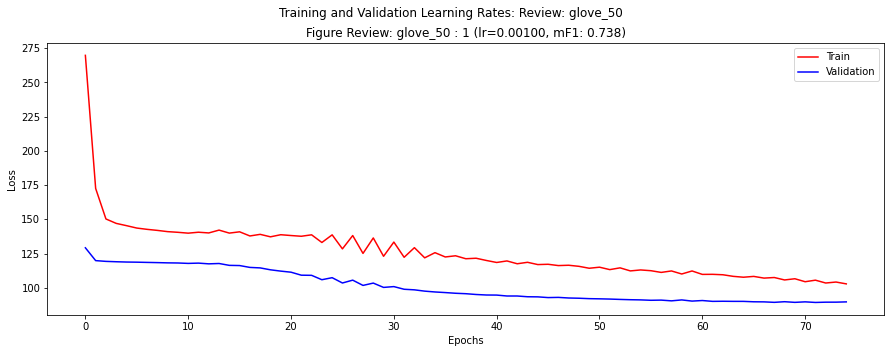

In [5]:
facade.epochs = 75
mng.run()

zensols.deepnlp.embed.word2vec: reading binary vector file
zensols.deepnlp.embed.word2vec: loading keyed file: ../corpus/word2vec/GoogleNews-vectors-negative300.bin
zensols.deepnlp.embed.word2vec: loaded key model from /home/landes/view/nlp/deepnlp/example/movie/notebook/../corpus/word2vec/GoogleNews-vectors-negative300.bin in 53s
zensols.deepnlp.embed.word2vec: loaded word2vec model in 53s
zensols.deepnlp.embed.word2vec: created data structures in 11s
zensols.deepnlp.embed.domain: created tensor vectory matrix on use cuda: True, device: cuda:0
zensols.deeplearn.model.facade: clearing
zensols.deeplearn.model.facade: creating new executor
zensols.deepnlp.embed.word2vec: reading binary vector file
zensols.deepnlp.embed.word2vec: loading keyed file: ../corpus/word2vec/GoogleNews-vectors-negative300.bin
zensols.deepnlp.embed.word2vec: loaded key model from /home/landes/view/nlp/deepnlp/example/movie/notebook/../corpus/word2vec/GoogleNews-vectors-negative300.bin in 52s
zensols.deepnlp.embed

Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 05/29/2021 01:58:23:337499
    ended: 05/29/2021 01:59:39:375767
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 73/75
    ave/min loss: 67.76234/13.21618
    accuracy: 0.848 (6859/8086)
    micro: F1: 0.848, precision: 0.848, recall: 0.848
    macro: F1: 0.848, precision: 0.850, recall: 0.848
    weighted: F1: 0.848, precision: 0.850, recall: 0.848
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 41/75
    ave/min loss: 84.07312/9.36197
    accuracy: 0.761 (783/1029)
    micro: F1: 0.761, precision: 0.761, recall: 0.761
    macro: F1: 0.761, precision: 0.763, recall: 0.761
    weighted: F1: 0.760, precision: 0.763, recall: 0.761
  test:
    started: 05/29/2021 01:59:43:320140
    ended: 05/29/2021 01:59:43:360162
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
    ave/min los

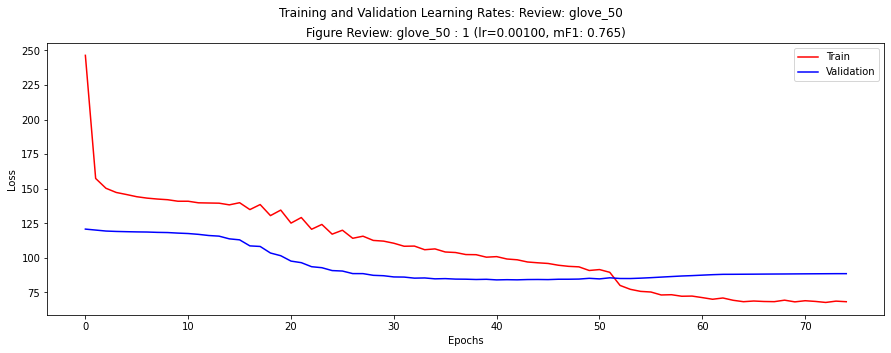

In [6]:
# changing the embedding updates the model, but currently results show initial loaded embeddings (glove50)
facade.embedding = 'word2vec_300_embedding'
mng.run()
# persist the plot and results to the file system (commented out to keep results only in notepad)
#facade.persist_result()

zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: loaded 47 batches in 9s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 35 epochs using learning rate 0.001
tr:73.177|va min:78.927|va:86.789|lr:0.001 /\: 100%|████████████████████████████████████| 35/35 [00:43<00:00,  1.07it/s]zensols.deeplearn.model.executor.status: epoch threshold reached at 35
zensols.deeplearn.model.executor.status: final minimum validation loss: 78.92661130428

Name: Review: transformer_fixed : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 05/29/2021 01:59:56:401065
    ended: 05/29/2021 02:00:40:196579
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 35/35
    ave/min loss: 73.17719/9.88753
    accuracy: 0.840 (6791/8086)
    micro: F1: 0.840, precision: 0.840, recall: 0.840
    macro: F1: 0.839, precision: 0.846, recall: 0.840
    weighted: F1: 0.839, precision: 0.846, recall: 0.840
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 28/35
    ave/min loss: 78.92661/7.73396
    accuracy: 0.799 (822/1029)
    micro: F1: 0.799, precision: 0.799, recall: 0.799
    macro: F1: 0.796, precision: 0.817, recall: 0.799
    weighted: F1: 0.796, precision: 0.817, recall: 0.799
  test:
    started: 05/29/2021 02:00:42:605988
    ended: 05/29/2021 02:00:42:654432
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
    ave

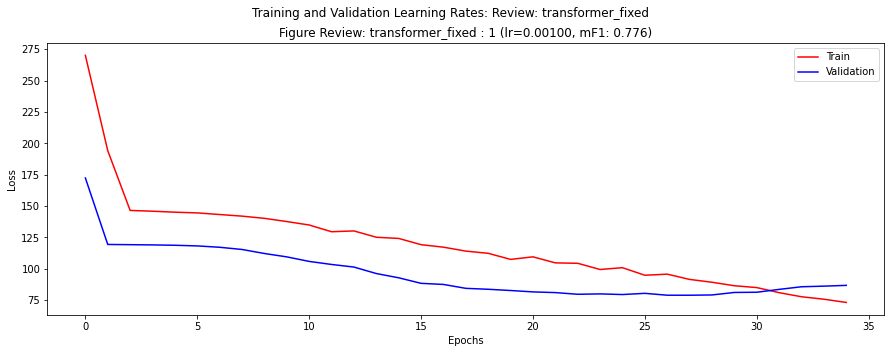

In [7]:
# when comparing several models with the same embeddings with different language
# features (later cells), recreate to get a consistent random seed and clean state
facade = mng.create_facade('transformer-fixed')
facade.language_attributes = set()
mng.run()

zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.facade: clearing
zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: loaded 47 batches in 30s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 35 epochs using learning rate 0.001
tr:84.872|va min:79.296|va:82.876|lr:0.001 /\: 100%|█| 35/35 [00:41<00:00,  1.0zensols.deeplearn.model.executor.status: epoch threshold reached at 35
zensols.deeplearn.model.executo

Name: Review: transformer_fixed : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 05/29/2021 02:01:19:018917
    ended: 05/29/2021 02:02:00:180419
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 35/35
    ave/min loss: 84.87225/12.09384
    accuracy: 0.795 (6427/8086)
    micro: F1: 0.795, precision: 0.795, recall: 0.795
    macro: F1: 0.794, precision: 0.799, recall: 0.795
    weighted: F1: 0.794, precision: 0.799, recall: 0.795
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 31/35
    ave/min loss: 79.29579/7.99962
    accuracy: 0.793 (816/1029)
    micro: F1: 0.793, precision: 0.793, recall: 0.793
    macro: F1: 0.790, precision: 0.814, recall: 0.794
    weighted: F1: 0.790, precision: 0.814, recall: 0.793
  test:
    started: 05/29/2021 02:02:07:486886
    ended: 05/29/2021 02:02:07:537982
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
    av

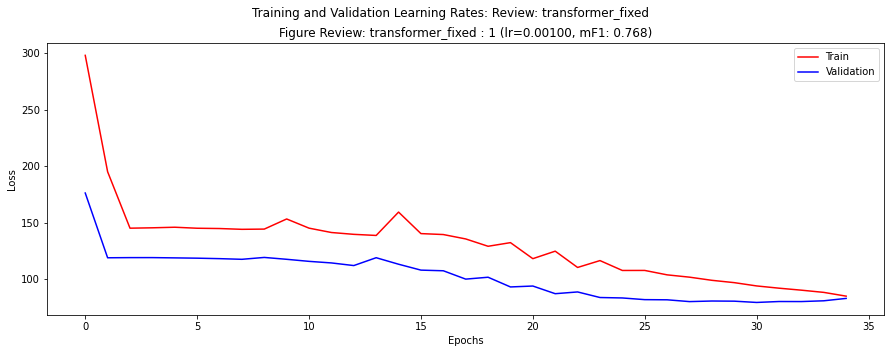

In [8]:
facade = mng.create_facade('transformer-fixed')
facade.epochs = 35
facade.language_attributes = {'enum_expander'}
mng.run()

zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.facade: clearing
zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: loaded 47 batches in 51s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 35 epochs using learning rate 0.001
tr:81.901|va min:77.368|va:80.742|lr:0.001 /\: 100%|█| 35/35 [00:43<00:00,  1.0zensols.deeplearn.model.executor.status: epoch threshold reached at 35
zensols.deeplearn.model.executo

Name: Review: transformer_fixed : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 05/29/2021 02:03:05:153720
    ended: 05/29/2021 02:03:49:021806
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 35/35
    ave/min loss: 81.90142/12.15076
    accuracy: 0.806 (6519/8086)
    micro: F1: 0.806, precision: 0.806, recall: 0.806
    macro: F1: 0.805, precision: 0.812, recall: 0.806
    weighted: F1: 0.805, precision: 0.812, recall: 0.806
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 30/35
    ave/min loss: 77.36818/8.33627
    accuracy: 0.803 (826/1029)
    micro: F1: 0.803, precision: 0.803, recall: 0.803
    macro: F1: 0.800, precision: 0.822, recall: 0.803
    weighted: F1: 0.800, precision: 0.823, recall: 0.803
  test:
    started: 05/29/2021 02:04:01:097625
    ended: 05/29/2021 02:04:01:148530
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
    av

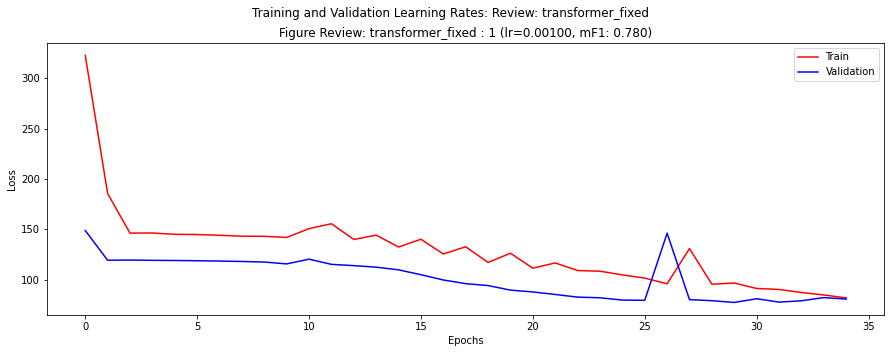

In [9]:
facade = mng.create_facade('transformer-fixed')
facade.language_attributes = {'enum_expander', 'dep_expander'}
mng.run()

zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.facade: clearing
zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: loaded 47 batches in 30s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 35 epochs using learning rate 0.001
tr:82.938|va min:76.751|va:82.270|lr:0.001 /\: 100%|█| 35/35 [00:43<00:00,  1.0zensols.deeplearn.model.executor.status: epoch threshold reached at 35
zensols.deeplearn.model.executo

Name: Review: transformer_fixed : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 05/29/2021 02:04:37:509890
    ended: 05/29/2021 02:05:20:826958
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 34/35
    ave/min loss: 80.67811/8.87665
    accuracy: 0.812 (6564/8086)
    micro: F1: 0.812, precision: 0.812, recall: 0.812
    macro: F1: 0.811, precision: 0.817, recall: 0.812
    weighted: F1: 0.811, precision: 0.817, recall: 0.812
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 30/35
    ave/min loss: 76.75101/8.67435
    accuracy: 0.798 (821/1029)
    micro: F1: 0.798, precision: 0.798, recall: 0.798
    macro: F1: 0.795, precision: 0.815, recall: 0.798
    weighted: F1: 0.795, precision: 0.815, recall: 0.798
  test:
    started: 05/29/2021 02:05:28:095532
    ended: 05/29/2021 02:05:28:144892
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
    ave

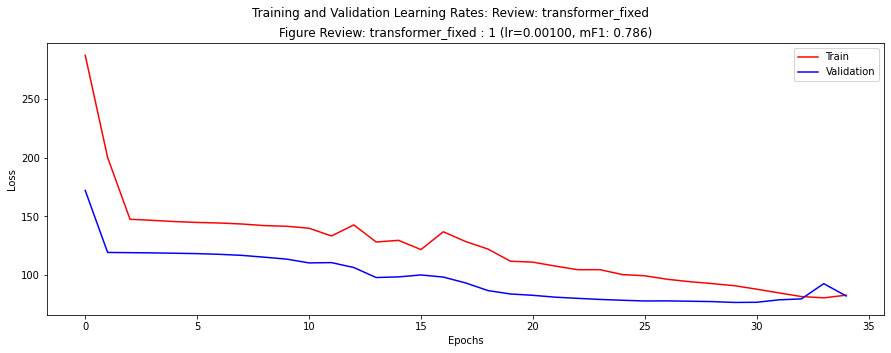

In [10]:
facade = mng.create_facade('transformer-fixed')
facade.language_attributes = {'dep_expander'}
mng.run()

zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: loaded 47 batches in 0s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 35 epochs using learning rate 2e-06
tr:47.487|va min:61.599|va:63.451|lr:2e-07 /\: 100%|████████████████████████████████████| 35/35 [15:56<00:00, 25.68s/it]zensols.deeplearn.model.executor.status: epoch threshold reached at 35
zensols.deeplearn.model.executor.status: final minimum validation loss: 61.59931678573

Name: Review: transformer_trainable : 1
Run index: 2
Learning rate: 2e-06
  train:
    started: 05/29/2021 02:05:31:886355
    ended: 05/29/2021 02:21:28:046101
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 35/35
    ave/min loss: 47.48749/7.21037
    accuracy: 0.913 (7386/8086)
    micro: F1: 0.913, precision: 0.913, recall: 0.913
    macro: F1: 0.913, precision: 0.918, recall: 0.914
    weighted: F1: 0.913, precision: 0.918, recall: 0.913
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 28/35
    ave/min loss: 61.59932/8.60632
    accuracy: 0.853 (878/1029)
    micro: F1: 0.853, precision: 0.853, recall: 0.853
    macro: F1: 0.853, precision: 0.854, recall: 0.853
    weighted: F1: 0.853, precision: 0.855, recall: 0.853
  test:
    started: 05/29/2021 02:21:29:656924
    ended: 05/29/2021 02:21:31:826173
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
   

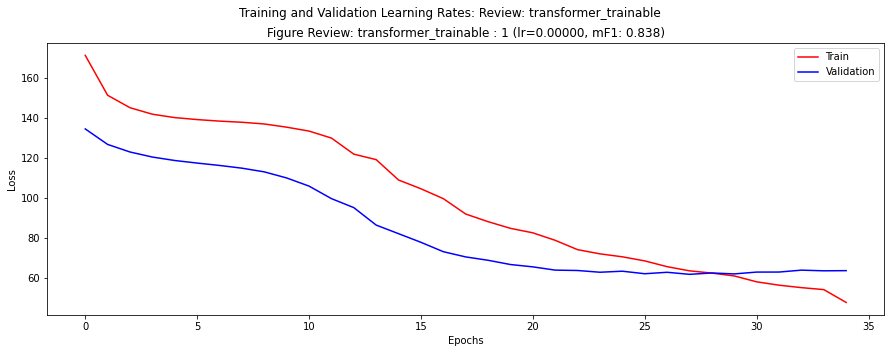

In [11]:
facade = mng.create_facade('transformer-trainable')
mng.run()

zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: loaded 47 batches in 0s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 35 epochs using learning rate 2e-06
tr:48.666|va min:61.397|va:63.188|lr:2e-09 /\: 100%|████████████████████████████████████| 35/35 [15:46<00:00, 25.60s/it]zensols.deeplearn.model.executor.status: epoch threshold reached at 35
zensols.deeplearn.model.executor.status: final minimum validation loss: 61.39749333262

Name: Review: transformer_trainable : 1
Run index: 2
Learning rate: 2e-06
  train:
    started: 05/29/2021 02:21:35:645643
    ended: 05/29/2021 02:37:21:774614
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 35/35
    ave/min loss: 48.66553/7.45336
    accuracy: 0.912 (7373/8086)
    micro: F1: 0.912, precision: 0.912, recall: 0.912
    macro: F1: 0.912, precision: 0.914, recall: 0.912
    weighted: F1: 0.912, precision: 0.914, recall: 0.912
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 23/35
    ave/min loss: 61.39749/10.06077
    accuracy: 0.852 (877/1029)
    micro: F1: 0.852, precision: 0.852, recall: 0.852
    macro: F1: 0.852, precision: 0.854, recall: 0.852
    weighted: F1: 0.852, precision: 0.854, recall: 0.852
  test:
    started: 05/29/2021 02:37:23:373987
    ended: 05/29/2021 02:37:25:543050
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
  

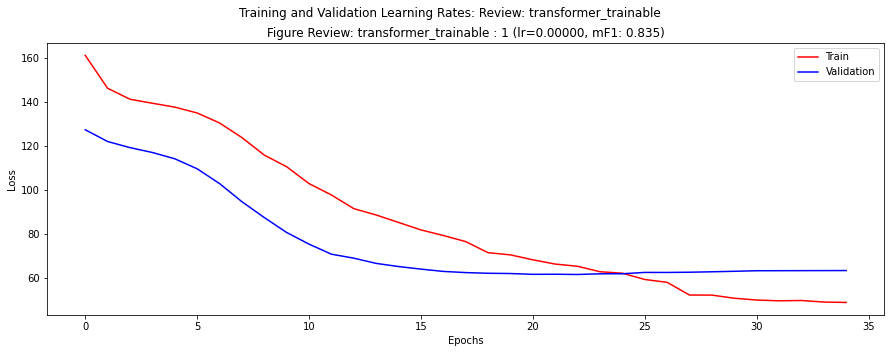

In [12]:
facade = mng.create_facade('transformer-trainable')
facade.model_settings.optimizer_params = {'weight_decay': 0.005}
facade.model_settings.scheduler_params = {'patience': 3}
facade.epochs = 25
mng.run()

zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: loaded 47 batches in 0s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 60 epochs using learning rate 1e-06
tr:53.156|va min:62.975|va:65.076|lr:1e-08 /\: 100%|████████████████████████████████████| 60/60 [27:21<00:00, 25.59s/it]zensols.deeplearn.model.executor.status: epoch threshold reached at 60
zensols.deeplearn.model.executor.status: final minimum validation loss: 62.97483586271

Name: Review: transformer_trainable : 1
Run index: 2
Learning rate: 1e-06
  train:
    started: 05/29/2021 02:37:29:300526
    ended: 05/29/2021 03:04:50:578568
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 60/60
    ave/min loss: 53.15616/11.15665
    accuracy: 0.898 (7265/8086)
    micro: F1: 0.898, precision: 0.898, recall: 0.898
    macro: F1: 0.898, precision: 0.901, recall: 0.899
    weighted: F1: 0.898, precision: 0.901, recall: 0.898
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 42/60
    ave/min loss: 62.97484/10.63026
    accuracy: 0.849 (874/1029)
    micro: F1: 0.849, precision: 0.849, recall: 0.849
    macro: F1: 0.849, precision: 0.850, recall: 0.849
    weighted: F1: 0.849, precision: 0.850, recall: 0.849
  test:
    started: 05/29/2021 03:04:52:492644
    ended: 05/29/2021 03:04:54:663394
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/epochs: 1/1
 

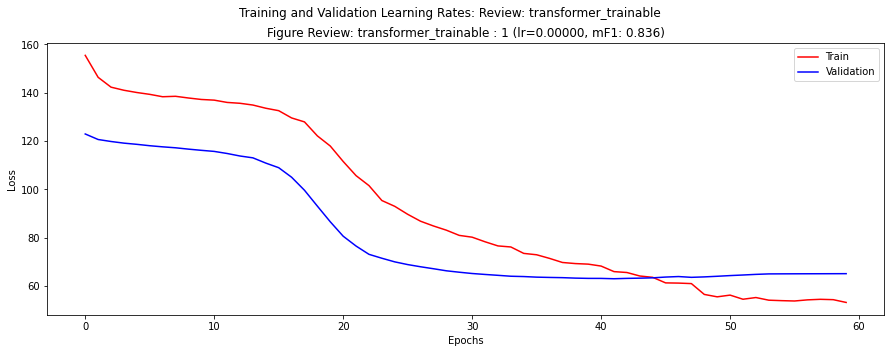

In [13]:
facade = mng.create_facade('transformer-trainable')
facade.epochs = 60
facade.learning_rate = 1e-6
mng.run()